<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

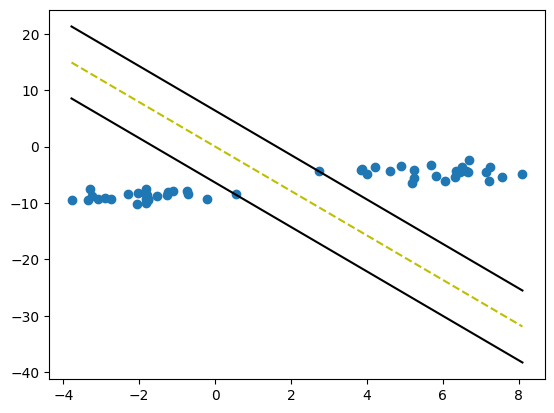

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class SVMLinear:
  def __init__(self, learning_rate = 0.001, lambda_param = 0.01, max_iteration = 1000):
    self.learning_rate = learning_rate
    self.lambda_param = lambda_param
    self.max_iteration = max_iteration
    self.weight = None
    self.bias = None
    self.cost_history = []

  def compute_cost(self, X, y, weight, bias):
    """Calculates the total cost (L2 Regularization + Hinge Loss)."""
    n_samples = X.shape
    # Hinge loss: max(0, 1 - y * (w.x - b))
    distances = 1 - y * (np.dot(X,weight)-bias)
    hinges_loss = np.maximum(0, distances)

    # Total cost = Regularization + mean Hinge Loss
    cost = self.lambda_param * np.sum(weight**2) + (np.sum(hinges_loss)/n_samples)

    return cost

  def fit(self, X, y):
    n_samples, n_features = X.shape

    y_ = np.where(y<= 0,-1,1)

    self.weight = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.max_iteration):
      for idx, x_i in enumerate(X):
        condition = (y_[idx] * (np.dot(self.weight , x_i) - self.bias)) >= 1
        if condition:
          self.weight -= self.learning_rate * (2 * self.lambda_param * self.weight)
        else:
          self.weight -= self.learning_rate * ((2*self.lambda_param*self.weight) - np.dot(x_i, y_[idx]))
          self.bias = self.learning_rate * y_[idx]

      cost = self.compute_cost(X, y_, self.weight, self.bias)
      self.cost_history.append(cost)

  def predict(self, X):
    linear_output = np.dot(X, self.weight) - self.bias
    return np.sign(linear_output)

  def visualize_svm(self, X):
    def get_hyperplane_value(x, w, b, offset):
      return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:,0], X[:,1])

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    y1_1 = get_hyperplane_value(x0_1, self.weight, self.bias, 0)
    y1_2 = get_hyperplane_value(x0_2, self.weight, self.bias, 0)
    ax.plot([x0_1, x0_2], [y1_1, y1_2], "y--", label="Hyperplane")

    y1_1 = get_hyperplane_value(x0_1, self.weight, self.bias, -1)
    y1_2 = get_hyperplane_value(x0_2, self.weight, self.bias, -1)
    ax.plot([x0_1, x0_2], [y1_1, y1_2], "k")

    y1_1 = get_hyperplane_value(x0_1, self.weight, self.bias, 1)
    y1_2 = get_hyperplane_value(x0_2, self.weight, self.bias, 1)
    ax.plot([x0_1, x0_2], [y1_1, y1_2], "k")

X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

svm = SVMLinear()
svm.fit(X,y)

svm.visualize_svm(X)